In [1]:
import torch

In [2]:
import torchvision

In [3]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [38]:
from PIL import Image

In [49]:
import os
from PIL import Image

PATH = './cut_imgs/insulator/'


def crop_images():
    
    os.mkdir(PATH + 'reshaped')
    files = os.listdir(PATH)

    for file_name in files:
        if file_name.endswith('.jpg'):
            image = Image.open(PATH + file_name)
            new_img = image.resize((64, 64))
            new_img.save(PATH + 'reshaped/' + file_name[:-4] + '.jpg')



crop_images()


In [39]:
class InsulatorDataset(Dataset):
    """Insulator dataset."""

    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        
        files = os.listdir(root_dir)

        
        self.imgs = []
        for file_name in files:
            if file_name.endswith('.jpg'):
                self.imgs.append(file_name)

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        img_name = os.path.join(self.root_dir, self.imgs[idx])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        return image

In [207]:
transformed_dataset = InsulatorDataset(root_dir='cut_imgs/insulator/reshaped',
                                           transform=transforms.Compose([
                                               transforms.Grayscale(),
                                               transforms.RandomCrop(64),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.RandomPerspective(),
                                               transforms.ToTensor()
                                           ]))
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)

In [213]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image

class Autoencoder(nn.Module):
    
#     def __init__(self):
#         super(Autoencoder,self).__init__()

#         self.encoder = nn.Sequential(
#             nn.Conv2d(3, 6, kernel_size=5),
#             nn.ReLU(True),
#             nn.Conv2d(6,16,kernel_size=5),
#             nn.ReLU(True))
#         self.decoder = nn.Sequential(             
#             nn.ConvTranspose2d(16,6,kernel_size=5),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(6,3,kernel_size=5),
#             nn.ReLU(True))
    def __init__(self):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(True),
            nn.Conv2d(6, 16,kernel_size=5),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 16,kernel_size=5),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16,16,kernel_size=5),
            nn.ConvTranspose2d(16, 16, 2, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(16,6,kernel_size=5),
            nn.ConvTranspose2d(6, 6, 2, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(6,1,kernel_size=5),
            nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
    def shit(self, x):
        return self.encoder(x)

In [214]:
model = Autoencoder().cpu()
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-5)

In [215]:
#defining some params
num_epochs = 100 #you can go for more epochs, I am using a mac
batch_size = 128

In [248]:
for epoch in range(num_epochs):
    for data in dataloader:
        img = data
        img = Variable(img).cpu()
        # ===================forward=====================
        output = model(img)
        loss = distance(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss))

epoch [1/100], loss:0.0038
epoch [2/100], loss:0.0025
epoch [3/100], loss:0.0040
epoch [4/100], loss:0.0040
epoch [5/100], loss:0.0047
epoch [6/100], loss:0.0031
epoch [7/100], loss:0.0043
epoch [8/100], loss:0.0039
epoch [9/100], loss:0.0028
epoch [10/100], loss:0.0053
epoch [11/100], loss:0.0034
epoch [12/100], loss:0.0035
epoch [13/100], loss:0.0037
epoch [14/100], loss:0.0029
epoch [15/100], loss:0.0035
epoch [16/100], loss:0.0036
epoch [17/100], loss:0.0020
epoch [18/100], loss:0.0037
epoch [19/100], loss:0.0039
epoch [20/100], loss:0.0032
epoch [21/100], loss:0.0038
epoch [22/100], loss:0.0025
epoch [23/100], loss:0.0023
epoch [24/100], loss:0.0039
epoch [25/100], loss:0.0022
epoch [26/100], loss:0.0038
epoch [27/100], loss:0.0033
epoch [28/100], loss:0.0045
epoch [29/100], loss:0.0040
epoch [30/100], loss:0.0030
epoch [31/100], loss:0.0032
epoch [32/100], loss:0.0030
epoch [33/100], loss:0.0031
epoch [34/100], loss:0.0031
epoch [35/100], loss:0.0030
epoch [36/100], loss:0.0031
e

In [249]:
ds = InsulatorDataset("cut_imgs/insulator/reshaped")


In [243]:
transforms.ToTensor()(ds[145].convert('A')).shape

ValueError: conversion from RGB to A not supported

In [250]:
transform=transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])

In [251]:
a = model(Variable(torch.reshape(transform(ds[145]), (1, 1, 64, 64))).cpu())

In [246]:
#a = model(Variable(torch.reshape(transforms.ToTensor()(ds[145].cone), (1, 1, 64, 64))).cpu())

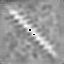

In [252]:
transforms.ToPILImage()(a[0, :, :, :])

In [201]:
print(a.shape)

torch.Size([1, 16, 9, 9])


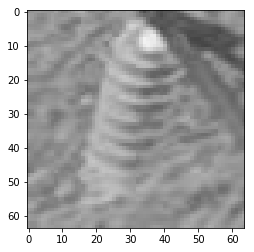

In [209]:
for data in dataloader:
    #print(data.shape)
    img = Variable(data).cpu()
    plt.imshow(transforms.ToPILImage()(img[0, :, :, :]))
#     print(img.shape)
#     output = model(img)

In [69]:
import matplotlib.pyplot as plt

In [256]:
torch.save(model, "hahaha")

In [257]:
%pwd

'/Users/artembakhanov/Code/hackatons/cifr2020'

In [259]:
model1 = torch.load("hahaha")
model1.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
    (6): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ConvTranspose2d(16, 16, kernel_size=(2, 2), stride=(2, 2))
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(16, 6, kernel_size=(5, 5), stride=(1, 1))
    (4): ConvTranspose2d(6, 6, kernel_size=(2, 2), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(6, 1, kernel_size=(5, 5), stride=(1, 1))
    (7): ReLU(inplace=True)
  )
)

In [270]:
a = model1(Variable(torch.reshape(transform(ds), (1, 1, 64, 64))).cpu())

TypeError: img should be PIL Image. Got <class '__main__.InsulatorDataset'>

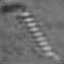

In [268]:
transforms.ToPILImage()(a[0, :, :, :])

## Isolation forest for anomaly detection

In [269]:
from sklearn.ensemble import IsolationForest

In [273]:
anomaly_dataset = InsulatorDataset(root_dir='cut_imgs/insulator/reshaped',
                                           transform=transforms.Compose([
                                               transforms.Grayscale(),
                                               transforms.RandomCrop(64),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.RandomPerspective(),
                                               transforms.ToTensor()
                                           ]))
anomaly_dataloader = DataLoader(transformed_dataset, batch_size=1,
                        shuffle=True, num_workers=0)

In [281]:
i = 0
a = []
for data in anomaly_dataloader:
    img = data
    img = Variable(img).cpu()
    output = model.shit(img)
    im = output[0, :, :, :].detach().numpy().reshape(-1)
    a.append(im)
#     im.save(f"insulator_anomaly_dataset/img/{str(i).zfill(4)}.jpg")
    i += 1
    
a = np.array(a)  

In [311]:
a.shape

(1072, 1296)

In [285]:
clf = IsolationForest(n_estimators=10, warm_start=True)
clf.fit(a)
clf.set_params(n_estimators=20)
clf.fit(a)

IsolationForest(n_estimators=20, warm_start=True)

In [290]:
clf.predict(np.random.rand(1, 1296))

array([-1])

In [296]:
clf.predict(a[123, :].reshape(1, -1))

array([1])

In [297]:
import pickle

In [298]:
s = pickle.dumps(clf)

In [302]:
with open("anomaly.model", "bw") as f:
    f.write(s)

In [304]:
with open("anomaly.model", "br") as f:
    modelka = f.read()
    clf_load = pickle.loads(modelka)

In [310]:
clf_load.predict(a[346, :].reshape(1, -1))

array([1])

In [312]:
np.save("anomaly_dataset_np.set", a)